In [20]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data
from scipy.stats import norm

%matplotlib inline

In [21]:
# # import data
# def get_data(stocks, start, end):
#     stockData = data.DataReader(stocks,'yahoo', start, end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change()
#     meanReturns = returns.mean()
#     covMatrix = create_covar(stockData)
#     return meanReturns, covMatrix

# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

In [22]:
def get_data(stocks, start, end):
    stockData = data.DataReader(stocks,'yahoo', start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stocks = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]
# stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# weights = np.random.random(len(meanReturns))
# weights /= np.sum(weights)

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [23]:
# def get_data(stocks, start_end, date_end):

tickers = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]

start_date = '2000-01-01'
end_date = '2020-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)
panel_data = panel_data['Adj Close']
returns = panel_data.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

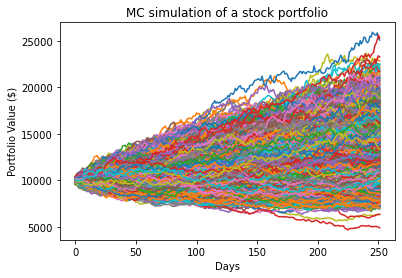

In [24]:
# Monte Carlo Method
mc_sims = 6000 # number of simulations
T = 252 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [25]:
df = pd.DataFrame(portfolio_sims)

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,9959.414730,9980.405427,9922.651916,10210.364041,10234.221510,9905.664865,9942.681056,10240.462480,9891.560589,10195.786232,...,10220.855141,10056.563382,10042.422907,9936.282113,10086.445192,9921.340376,9903.746746,9978.040595,10133.590565,10079.825728
1,9850.289601,9775.801810,10025.808799,10164.199849,10155.224327,9772.007509,9900.185423,10322.647839,9915.471800,10135.774171,...,10276.954147,9897.762892,10104.111833,10028.119889,10373.338473,9884.589342,10181.597879,9969.516368,9945.744867,10004.934143
2,9819.990471,9746.780222,9948.068665,10013.572765,10380.318343,9587.470282,9905.509964,10306.569278,9867.959315,10091.792755,...,10334.173325,10008.246988,10061.766391,9967.294906,10441.491701,9919.836879,10062.953417,9826.899684,9938.427815,10017.164218
3,9709.913988,9471.153933,9899.941359,10001.810504,10506.912277,9572.680930,10004.966964,10417.039720,9922.523597,10125.434295,...,10381.322420,10037.836580,9878.165931,9884.981259,10593.775431,9982.763230,10118.812606,9794.534859,9848.487987,9965.406746
4,9645.377683,9271.517490,10147.989909,9893.014804,10572.641722,9702.681113,9968.263931,10646.524723,9816.440850,10198.620707,...,10302.660212,10057.822782,9846.662167,10188.826496,10749.480447,10103.755441,10151.876929,9530.065630,9881.783496,10027.830367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,12898.518208,11237.847738,14244.790307,13252.059553,14643.462654,11222.007092,10036.224381,14141.362644,10995.475432,12089.400576,...,13887.953152,11739.666659,15423.979353,12205.467004,12611.801541,10286.876216,10421.904492,9851.672759,14195.078135,9979.444753
248,12999.571507,11272.843873,14239.359924,13411.463870,14827.457501,11215.224185,10058.876323,14039.167524,11120.076904,12262.377196,...,13798.304120,11681.263864,15644.695080,12195.779790,12781.769049,10467.370590,10723.767555,10049.413314,13913.062716,9965.049054
249,12746.373845,11316.962549,14370.409766,13395.047682,14766.245462,11150.722053,10107.965517,13951.745729,11058.270354,12391.188102,...,13856.136388,11770.591622,15667.231189,12117.849929,12656.373494,10637.650428,10786.898688,10160.712979,13682.753053,10039.552598
250,12784.627212,11077.112708,14569.076432,13695.018782,15241.897628,10875.690904,9938.059069,13911.768415,11197.637385,12381.922937,...,13790.384201,11856.424079,15687.531127,12281.871332,12867.043292,10695.502998,10884.660090,10219.440078,13429.501156,10196.709408


In [11]:
percentagelist = []

for i in range(0,6000):
    initial = df[i].iloc[0]
    end = df[i].iloc[251]
    change = ((end-initial)/initial)*100
    percentagelist.append(change)

In [12]:
percentagelist

[32.19600133566015,
 22.25625546880794,
 49.462214331614085,
 17.291258982093243,
 6.84623110628758,
 35.87942930523032,
 -6.174114490826545,
 63.37612356837764,
 23.282334143797087,
 -2.645879582917292,
 39.14640138991459,
 18.50514313316889,
 22.368358146294586,
 25.050795901675176,
 49.92607450395202,
 35.268671092963146,
 2.929711946876573,
 26.672404552540048,
 31.285371222664605,
 49.88203212671673,
 38.108759725666374,
 33.49932220862457,
 28.14882013978216,
 48.071394323787324,
 -9.729629886913033,
 33.55223172680864,
 14.656517991975937,
 23.105185234961965,
 41.92601929308128,
 11.873391915610313,
 35.67803890632686,
 18.80144244831414,
 28.469769021423474,
 41.515648276049085,
 15.184199316386271,
 42.511034446705445,
 18.590233037633197,
 15.882545125597607,
 23.461144865035685,
 -4.431768941487721,
 58.232043756054374,
 25.436275182703156,
 45.78448353102867,
 10.327578384145536,
 56.45650030473579,
 20.922200056057587,
 29.115457331309795,
 29.12462826392277,
 20.66202354

In [13]:
max(percentagelist)

138.288239269455

In [14]:
min(percentagelist)

-36.572126441417346

In [15]:
total = 0
for n in percentagelist:
    total += n
    
avg = total/10000

avg

16.500070196254445

In [16]:
tickers = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", "PG", "PGR", "NEM", "CCI"]

start_date = '2020-01-01'
end_date = '2021-01-01'

panel_data = data.DataReader(tickers,'yahoo',start_date,end_date)

weights = [0.05,0.1,0.05,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

return_series_adj = (panel_data['Adj Close'].pct_change()+ 1).cumprod() - 1

weighted_return_series_test = weights * (return_series_adj)
#Sum the weighted returns for SPY and TLT
return_series_test = weighted_return_series_test.sum(axis=1) #add up the returns from the 2 ETFs

#Plot the weighted returns and individual returns on the same plot for comparison
# fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(return_series_test, label = 'weight_SPY_TLT')

# return_series_adj_spy_tlt.plot(figsize=(16,9))
# ax.plot(return_series_adj['AAPL'] , label = 'SPY')
# ax.plot(return_series_adj['MSFT'] , label = 'TLT')
# ax.plot(return_series_adj['AMZN'] , label = 'TLT')
# ax.plot(return_series_adj['TSLA'] , label = 'TSLA')
# ax.legend()

In [17]:
test_returns = return_series_test.tail(1)
print("Portfolio Return:", test_returns[-1].round(3))

Portfolio Return: 0.459


In [18]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
251,13076.119119,12082.491424,15164.447021,11622.302381,10670.432261,13675.983901,9446.250121,16295.348349,12271.210357,9623.604069,...,16508.282007,10424.360943,14412.21422,17576.503366,15052.903281,10570.535804,14274.92601,12545.583363,9151.448209,9784.956114


In [19]:
df.iloc[251].mean()

12762.135098610808